In [142]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import missingno
from wordcloud import WordCloud
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor


In [144]:
df = pd.read_csv('C:\\Users\\Admin\\Downloads\\data.csv')
df['PriceInr'] = df['PriceEuro']*92.28
df.drop(columns ='Unnamed: 0', axis=1, inplace=True)

In [148]:
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,PriceInr
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480,5119694.40
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000,2768400.00
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440,5208283.20
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040,6278731.20
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997,3044963.16


### >> Columns details
#### Brand, Model: Identifiers for the car manufacturer and the specific model.
#### AccelSec: Acceleration time from 0 to 100 km/h, a performance metric.
#### TopSpeed_KmH: The maximum speed the vehicle can achieve.
#### Range_Km: Distance the vehicle can cover on a full charge.
#### Efficiency_WhKm: Energy efficiency, measured in watt-hours per kilometer.
#### FastCharge_KmH: Charging speed in terms of kilometers per hour.
#### RapidCharge: A binary feature indicating whether rapid charging is supported.
#### PowerTrain, PlugType: Technical specifications related to the car’s drivetrain and charging type.
#### BodyStyle, Segment: The car’s design and market segment (e.g., sedan, SUV).
#### Seats: Number of seats in the vehicle.
#### PriceEuro: Price of the vehicle in Euros.
#### PriceInr :  Price of the vehicle in Rupees

In [5]:
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,PriceInr
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480,5119694.40
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000,2768400.00
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440,5208283.20
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040,6278731.20
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997,3044963.16


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    int64  
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
 14  PriceInr         103 non-null    float64
dtypes: float64(2), int64(6), object(7)
memory usage: 12.2+ KB


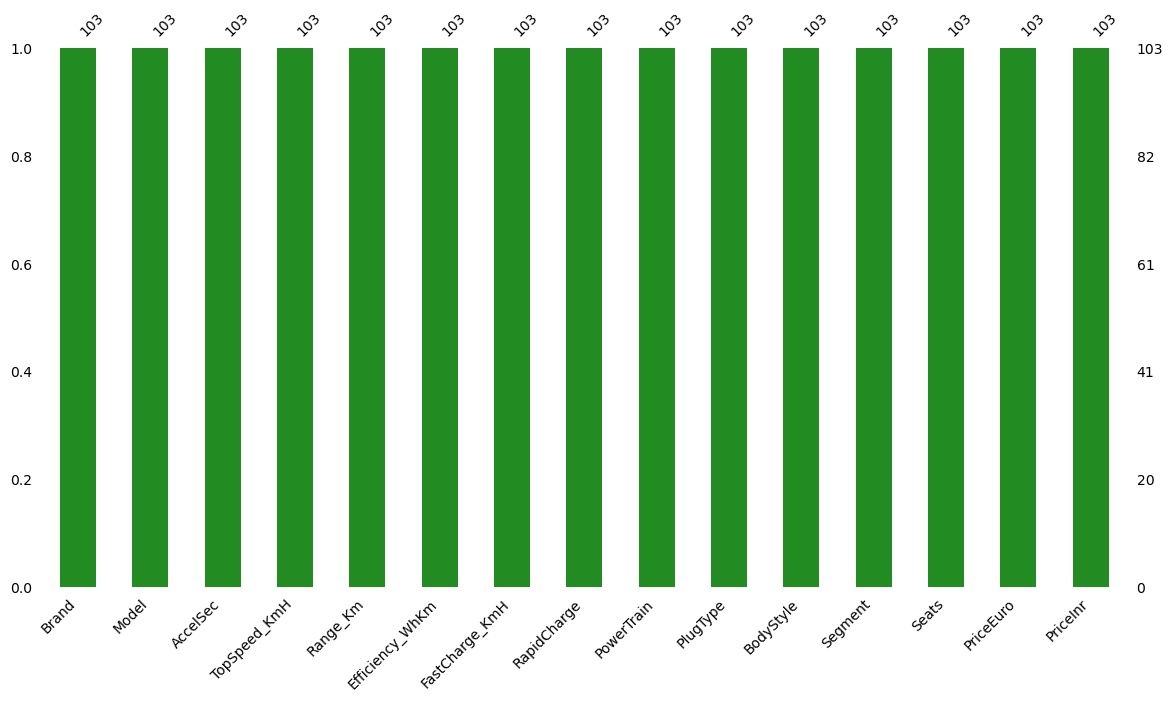

In [7]:
    missingno.bar(df, color="forestgreen", sort="ascending", figsize=(14,7), fontsize=10);

In [8]:
df['RapidCharge'].replace(['No','Yes'],value=[0, 1],inplace=True)

In [9]:
df.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,Seats,PriceEuro,PriceInr
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,1.030000e+02
mean,7.396117,179.194175,338.786408,189.165049,444.271845,0.747573,4.883495,55811.563107,5.150291e+06
std,3.017430,43.573030,126.014444,29.566839,203.949253,0.436529,0.795834,34134.665280,3.149947e+06
min,2.100000,123.000000,95.000000,104.000000,170.000000,0.000000,2.000000,20129.000000,1.857504e+06
25%,5.100000,150.000000,250.000000,168.000000,260.000000,0.500000,5.000000,34429.500000,3.177154e+06
50%,7.300000,160.000000,340.000000,180.000000,440.000000,1.000000,5.000000,45000.000000,4.152600e+06
75%,9.000000,200.000000,400.000000,203.000000,555.000000,1.000000,5.000000,65000.000000,5.998200e+06
max,22.400000,410.000000,970.000000,273.000000,940.000000,1.000000,7.000000,215000.000000,1.984020e+07


In [10]:
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,PriceInr
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,1,AWD,Type 2 CCS,Sedan,D,5,55480,5119694.40
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,0,RWD,Type 2 CCS,Hatchback,C,5,30000,2768400.00
2,Polestar,2,4.7,210,400,181,620,1,AWD,Type 2 CCS,Liftback,D,5,56440,5208283.20
3,BMW,iX3,6.8,180,360,206,560,1,RWD,Type 2 CCS,SUV,D,5,68040,6278731.20
4,Honda,e,9.5,145,170,168,190,1,RWD,Type 2 CCS,Hatchback,B,4,32997,3044963.16


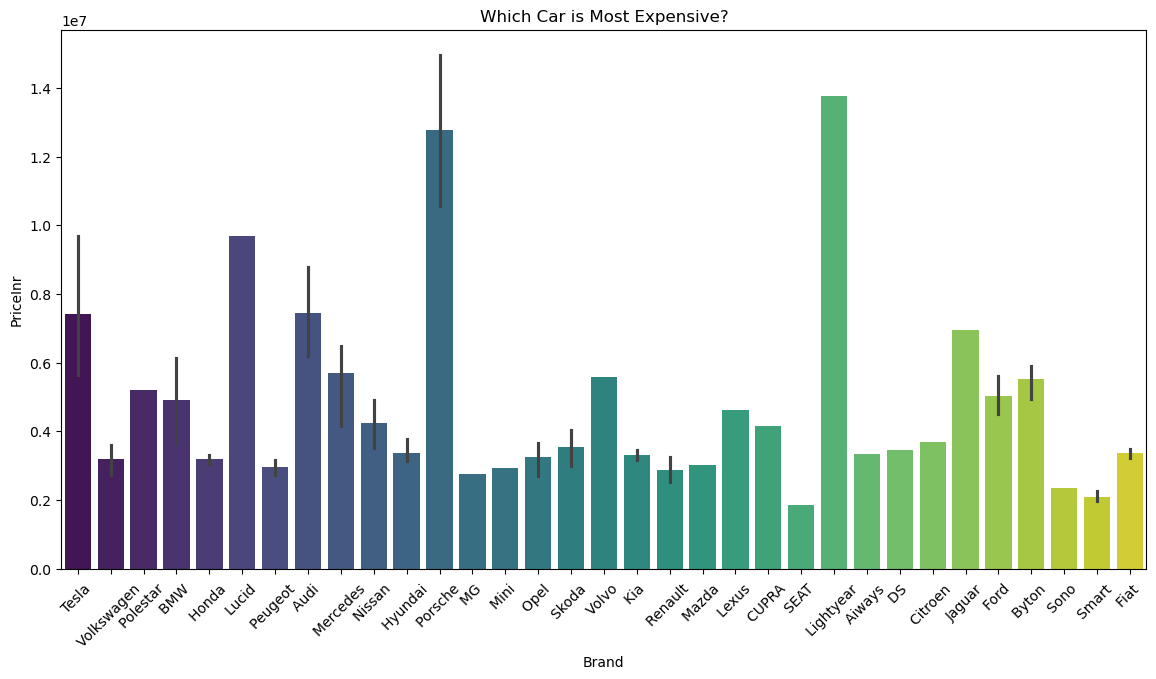

In [11]:
# Which Car is most Expensive?
plt.figure(figsize=(14, 7)) 
sns.barplot(x='Brand', y='PriceInr', data=df, palette='viridis')
plt.xticks(rotation=45)
plt.title('Which Car is Most Expensive?')
plt.show()

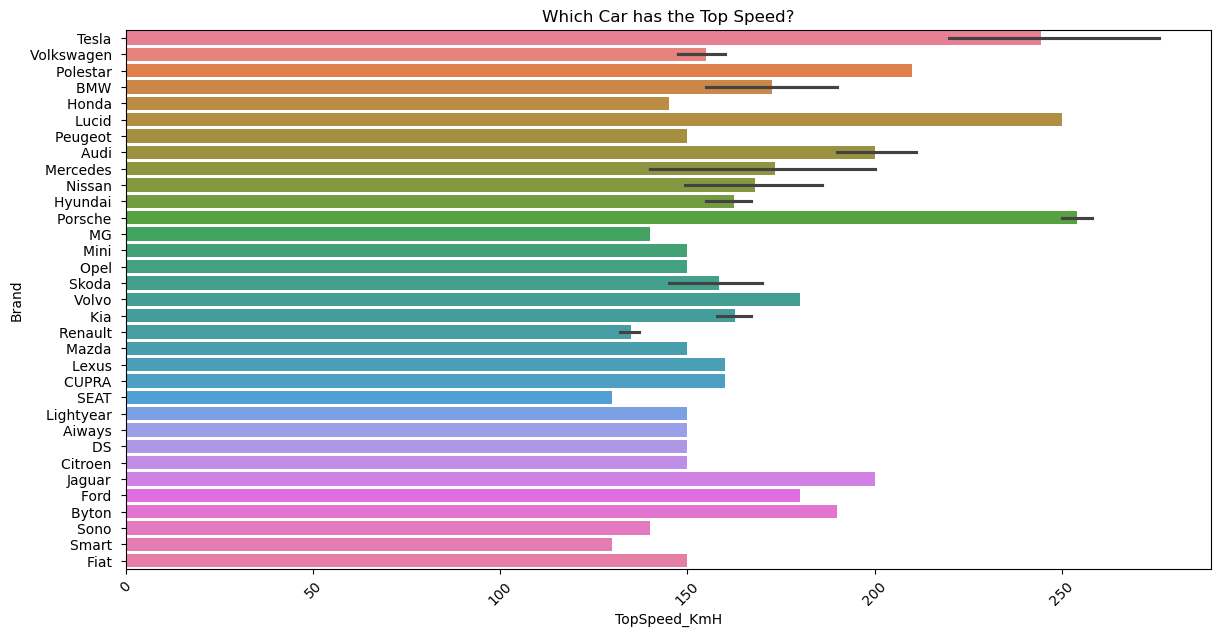

In [12]:
# Which Car has the Top Speed?
plt.figure(figsize=(14, 7)) 
sns.barplot(x='TopSpeed_KmH', y='Brand', data=df, palette='husl')
plt.xticks(rotation=45)
plt.title('Which Car has the Top Speed?')
plt.show()

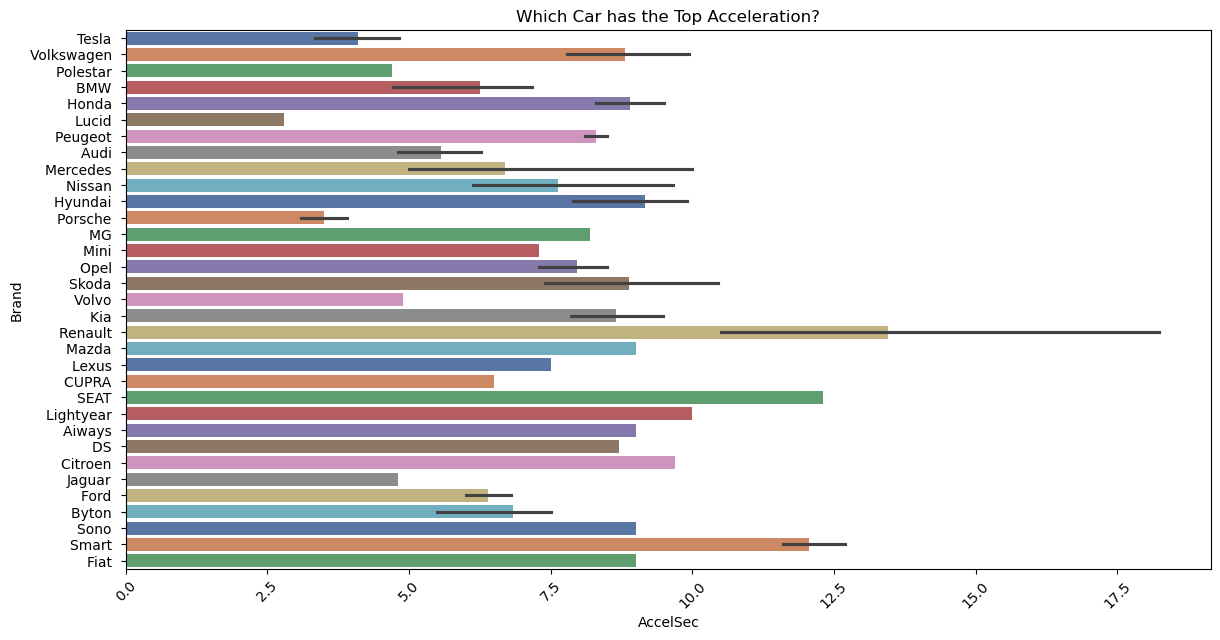

In [13]:
# Which Car has the Top Acceleration?  # Acceleration time from 0 to 100 km/h
plt.figure(figsize=(14, 7)) 
sns.barplot(x='AccelSec', y='Brand', data=df, palette='deep')
plt.xticks(rotation=45)
plt.title('Which Car has the Top Acceleration?')
plt.show()

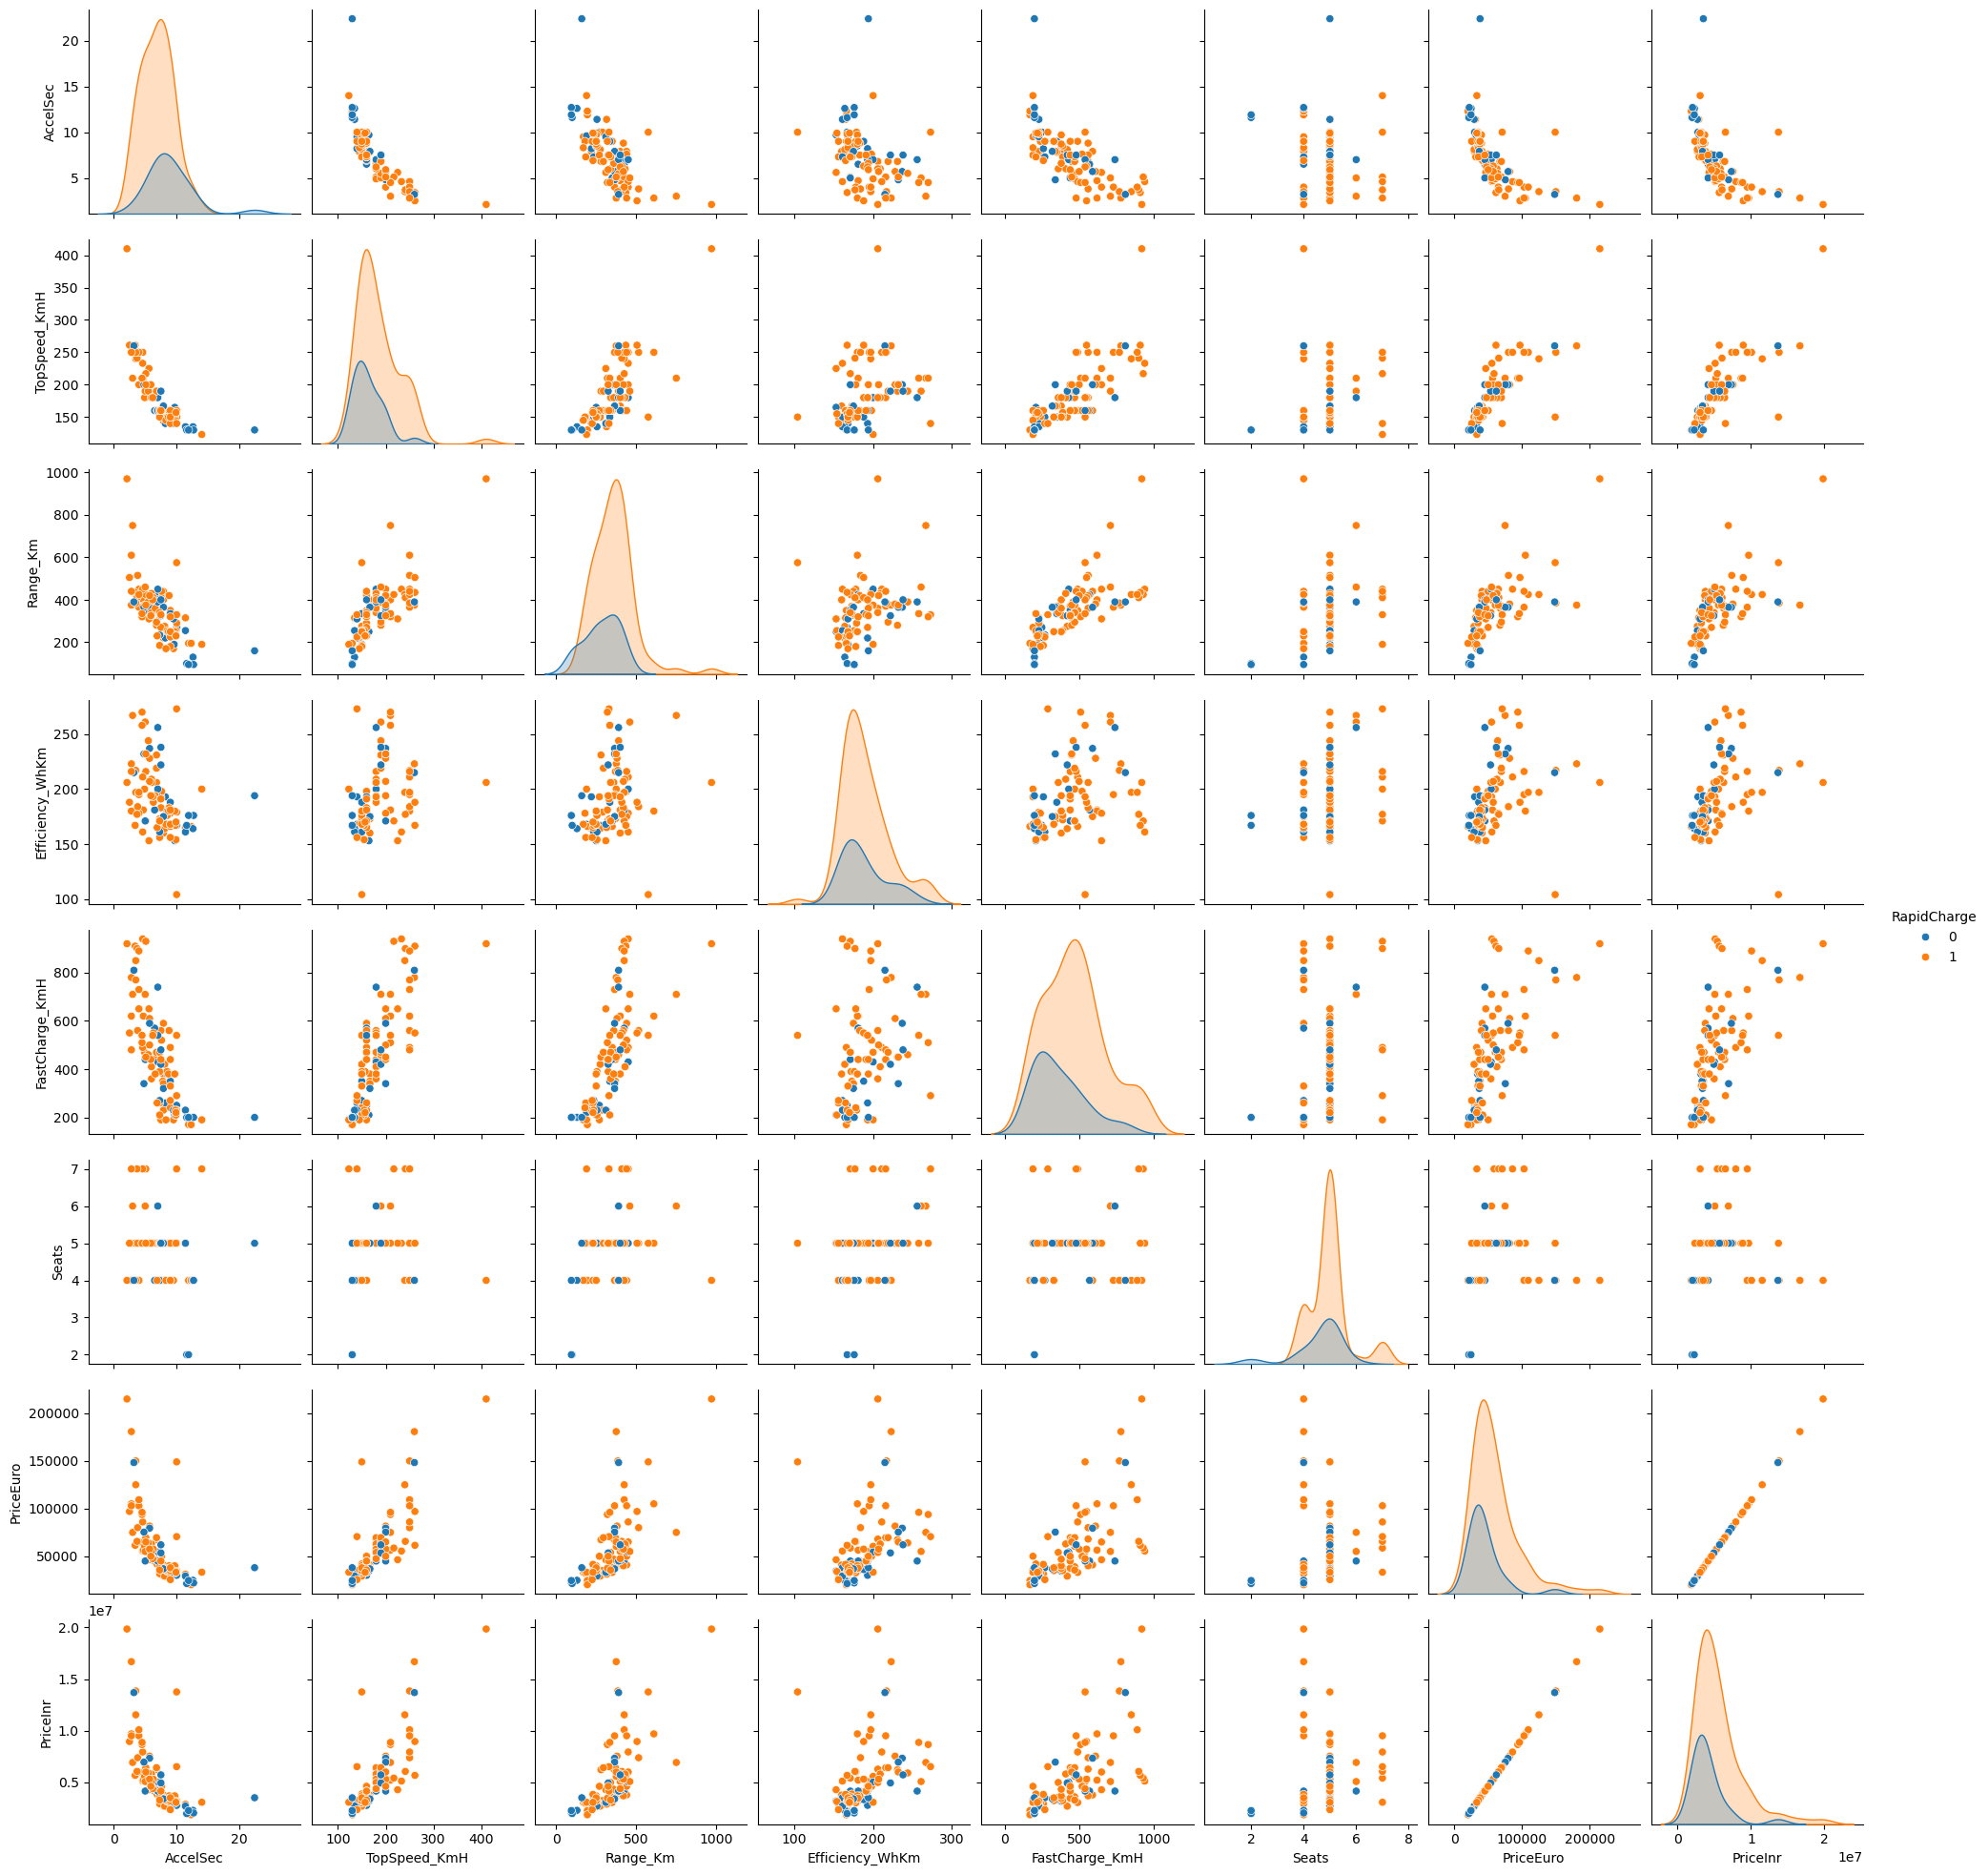

In [28]:
# Pairplot of all the columns based on Rapid Charger
sns.pairplot(df,hue='RapidCharge')

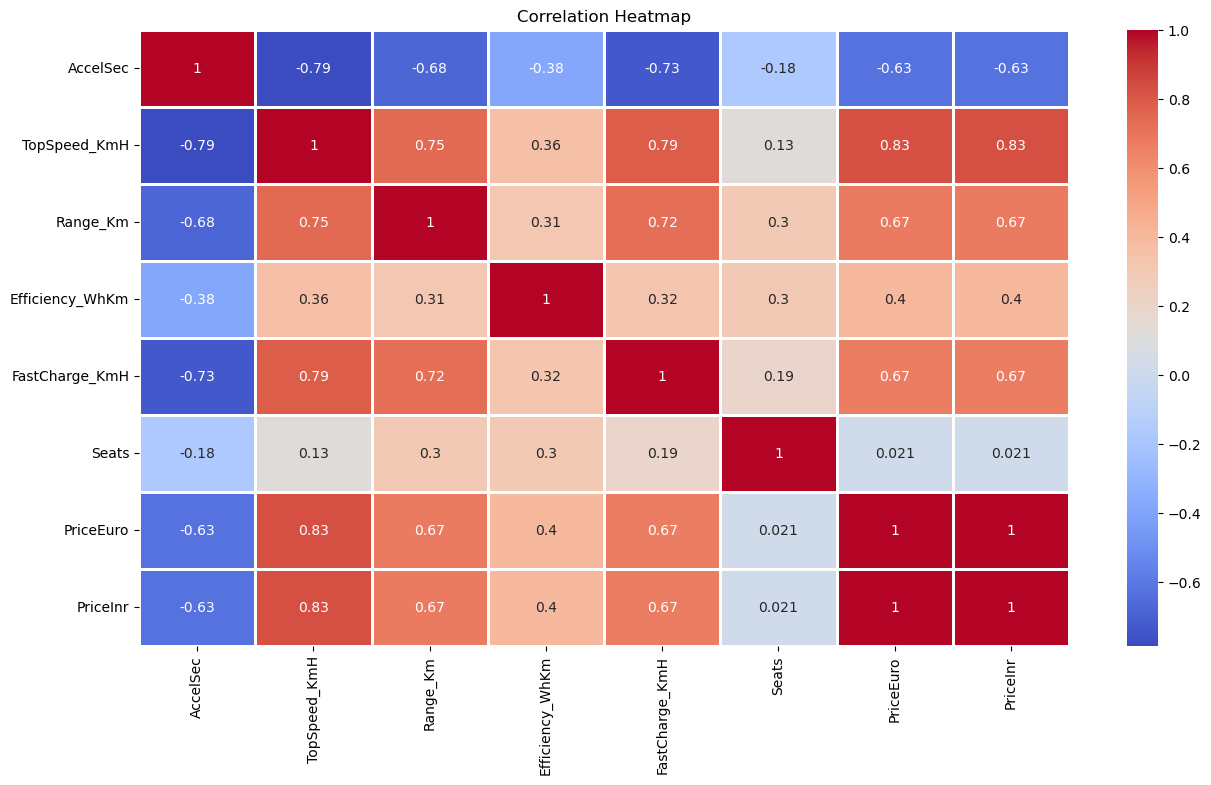

In [43]:
# Correlation of the data using Heatmap
numeric_columns = ['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm','FastCharge_KmH', 'Seats', 'PriceEuro', 'PriceInr']
plt.figure(figsize=(15, 8))
sns.heatmap(df[numeric_columns].corr(), linewidths=1, linecolor='white', annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [53]:
top_brands = df['Brand'].value_counts()
print(top_brands)

Brand
Tesla          13
Audi            9
Nissan          8
Volkswagen      8
Skoda           6
Renault         5
Porsche         5
Kia             5
BMW             4
Ford            4
Smart           3
Byton           3
Mercedes        3
Hyundai         3
Opel            3
Fiat            2
Peugeot         2
Honda           2
Mini            1
DS              1
Polestar        1
Sono            1
Lucid           1
Jaguar          1
Citroen         1
Aiways          1
MG              1
Lightyear       1
SEAT            1
CUPRA           1
Lexus           1
Mazda           1
Volvo           1
Name: count, dtype: int64


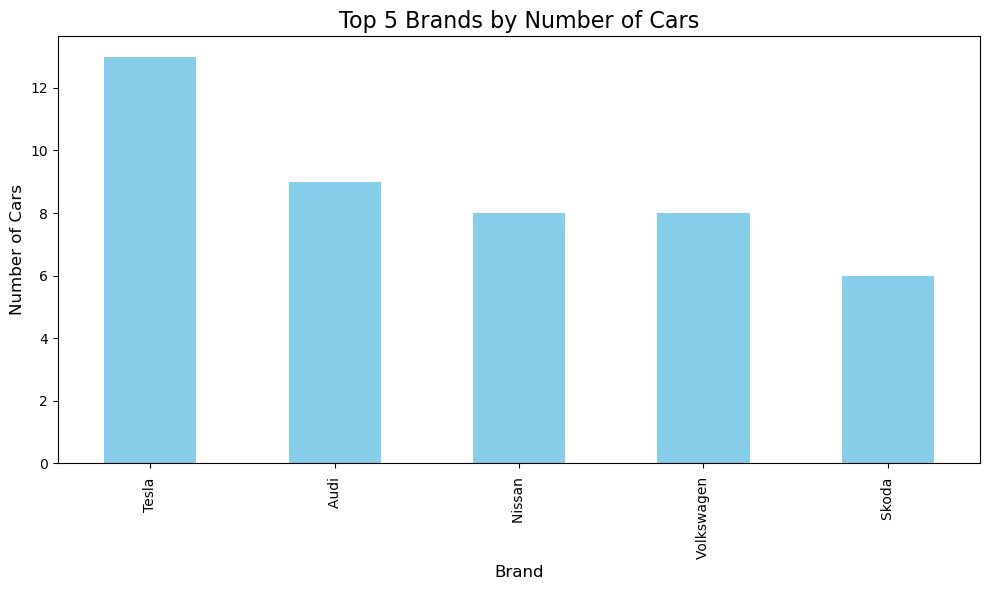

In [51]:
# Plot the top 5 brands in a bar chart
top_brands = df['Brand'].value_counts().head(5)
plt.figure(figsize=(10,6))
top_brands.plot(kind='bar', color='skyblue')
plt.title('Top 5 Brands by Number of Cars', fontsize=16)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Number of Cars', fontsize=12)
plt.tight_layout()
plt.show()

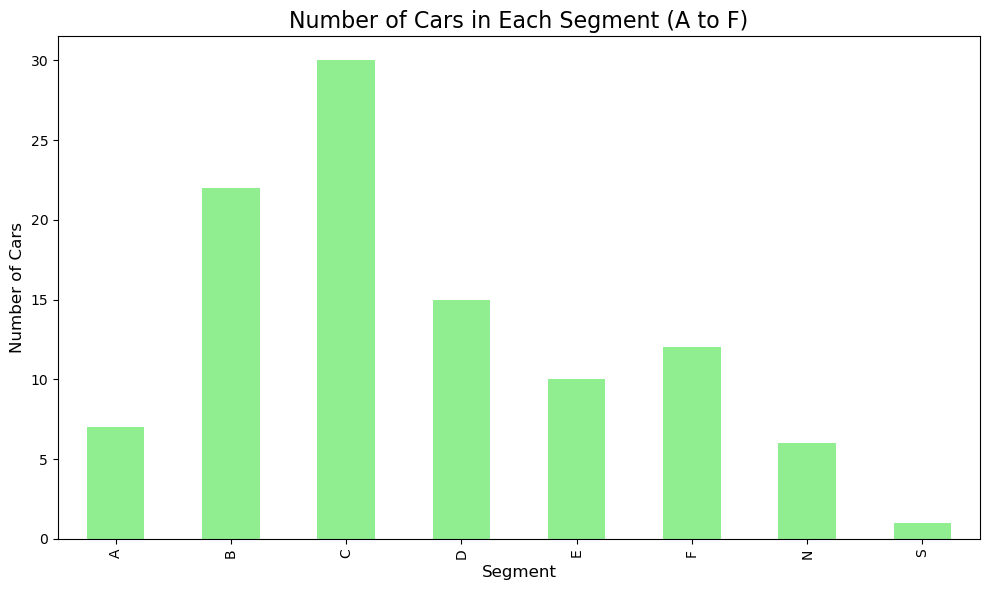

,Segment,Brand,Model,Range_Km,TopSpeed_KmH,PriceEuro
17,A,Volkswagen,e-Up!,195,130,21421
12,B,Hyundai,Kona Electric 64 kWh,400,167,40795
15,C,Volkswagen,ID.3 Pro S,440,160,40936
0,D,Tesla,Model 3 Long Range Dual Motor,450,233,55480
102,E,Byton,M-Byte 95 kWh 2WD,400,190,62000
5,F,Lucid,Air,610,250,105000
33,N,Tesla,Cybertruck Tri Motor,750,210,75000
51,S,Tesla,Roadster,970,410,215000


In [55]:
# Plot of cars across segments
plt.figure(figsize=(10,6))
df['Segment'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title('Number of Cars in Each Segment, fontsize=16)
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Number of Cars', fontsize=12)
plt.tight_layout()
plt.show()

# Finding the best car in each segment through Range_Km
best_cars = df.loc[df.groupby('Segment')['Range_Km'].idxmax()]
best_cars[['Segment', 'Brand', 'Model', 'Range_Km', 'TopSpeed_KmH', 'PriceEuro']]

In [57]:
# Finding the best car in each segment through TopSpeed_KmH
best_cars = df.loc[df.groupby('Segment')['TopSpeed_KmH'].idxmax()]
best_cars[['Segment', 'Brand', 'Model', 'Range_Km', 'TopSpeed_KmH', 'PriceEuro']]

,Segment,Brand,Model,Range_Km,TopSpeed_KmH,PriceEuro
57,A,Renault,Twingo ZE,130,135,24790
12,B,Hyundai,Kona Electric 64 kWh,400,167,40795
39,C,Mercedes,EQA,350,200,45000
24,D,Tesla,Model 3 Long Range Performance,435,261,61480
90,E,Audi,e-tron S 55 quattro,320,210,93800
59,F,Tesla,Model S Performance,505,261,96990
33,N,Tesla,Cybertruck Tri Motor,750,210,75000
51,S,Tesla,Roadster,970,410,215000


In [61]:
# Finding the costliest car in each segment
best_cars = df.loc[df.groupby('Segment')['PriceEuro'].idxmax()]
best_cars[['Segment', 'Brand', 'Model', 'Range_Km', 'TopSpeed_KmH', 'PriceEuro']]

,Segment,Brand,Model,Range_Km,TopSpeed_KmH,PriceEuro
57,A,Renault,Twingo ZE,130,135,24790
46,B,Opel,Ampera-e,335,150,41906
101,C,Nissan,Ariya e-4ORCE 87kWh Performance,375,200,65000
10,D,Mercedes,EQC 400 4MATIC,370,180,69484
99,E,Audi,e-tron S Sportback 55 quattro,335,210,96050
16,F,Porsche,Taycan Turbo S,375,260,180781
33,N,Tesla,Cybertruck Tri Motor,750,210,75000
51,S,Tesla,Roadster,970,410,215000


In [63]:
# Finding the Cheapest car in each segment
best_cars = df.loc[df.groupby('Segment')['PriceEuro'].idxmin()]
best_cars[['Segment', 'Brand', 'Model', 'Range_Km', 'TopSpeed_KmH', 'PriceEuro']]

,Segment,Brand,Model,Range_Km,TopSpeed_KmH,PriceEuro
44,A,SEAT,Mii Electric,195,130,20129
20,B,Opel,Corsa-e,275,150,29146
74,C,Sono,Sion,225,140,25500
8,D,Tesla,Model 3 Standard Range Plus,310,225,46380
97,E,Byton,M-Byte 72 kWh 2WD,325,190,53500
40,F,Tesla,Model S Long Range,515,250,79990
66,N,Nissan,e-NV200 Evalia,190,123,33246
51,S,Tesla,Roadster,970,410,215000


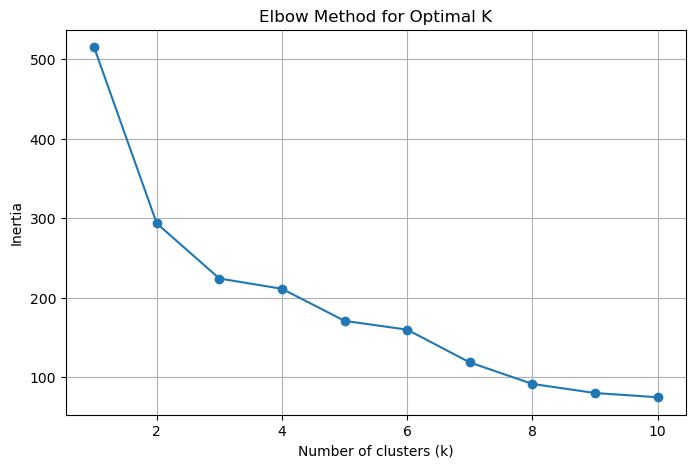

In [150]:
# Features for clustering
clustering_features = ['PriceEuro', 'Range_Km', 'Efficiency_WhKm', 'AccelSec', 'TopSpeed_KmH']

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[clustering_features])

inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [84]:
# Perform KMeans clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Analyze clusters
cluster_analysis = df.groupby('Cluster').agg({
    'PriceEuro': 'mean',
    'Range_Km': 'mean',
    'Efficiency_WhKm': 'mean',
    'AccelSec': 'mean',
    'TopSpeed_KmH': 'mean',
    'Seats': 'mean'
}).reset_index()

print(cluster_analysis)


   Cluster      PriceEuro    Range_Km  Efficiency_WhKm  AccelSec  \
0        0   33992.326923  258.846154       171.461538  9.440385   
1        1  133786.400000  361.000000       236.600000  3.700000   
2        2  104214.384615  505.769231       183.307692  3.984615   
3        3   59311.242424  395.606061       212.181818  6.078788   

   TopSpeed_KmH     Seats  
0    150.653846  4.673077  
1    238.000000  4.400000  
2    253.538462  5.153846  
3    185.969697  5.181818  


In [81]:
# Features for regression
regression_features = ['Range_Km', 'Efficiency_WhKm', 'AccelSec', 'TopSpeed_KmH', 'Seats']
X = df[regression_features]
y = df['PriceEuro']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Make predictions
y_pred = regression_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')


Mean Absolute Error: 13555.571413703474
R² Score: 0.6298230334963957


In [121]:
# Scaling the Data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_features),  # Scale continuous features
        ('cat', OneHotEncoder(drop='first'), categorical_features)  # One-hot encode 
    ])

X = df[continuous_features + categorical_features]
y = df['PriceEuro']

X_processed = preprocessor.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - Mean Absolute Error: {mae_rf}')
print(f'Random Forest - R² Score: {r2_rf}')


Random Forest - Mean Absolute Error: 6721.048571428572
Random Forest - R² Score: 0.8659365664438381


In [146]:
# Features for linear Regression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Make predictions
y_pred = regression_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

Mean Absolute Error: 9176.610479740684
R² Score: 0.8150207895422769


In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 3 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Sl. No.                                              33 non-null     object
 1   State/UTs                                            33 non-null     object
 2   Number of EV charging Stations on National Highways  33 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 924.0+ bytes


In [155]:
df1 = pd.read_csv('C:\\Users\\Admin\\Downloads\\RS_Session_265_AU_277_A_to_B_i.csv') 
df1 = df1.iloc[:-1]
df1.drop(columns ='Sl. No.', axis=1, inplace=True)

In [159]:
df1
top_charging_stations = df1.nlargest(5, "Number of EV charging Stations on National Highways")
top_charging_stations

,State/UTs,Number of EV charging Stations on National Highways
16,Maharashtra,750
30,Uttar Pradesh,577
25,Rajasthan,482
27,Tamil Nadu,369
13,Karnataka,300


In [27]:
df1.describe()

,Number of EV charging Stations on National Highways
count,33.000000
mean,160.393939
std,178.896608
min,1.000000
25%,27.000000
50%,96.000000
75%,231.000000
max,750.000000


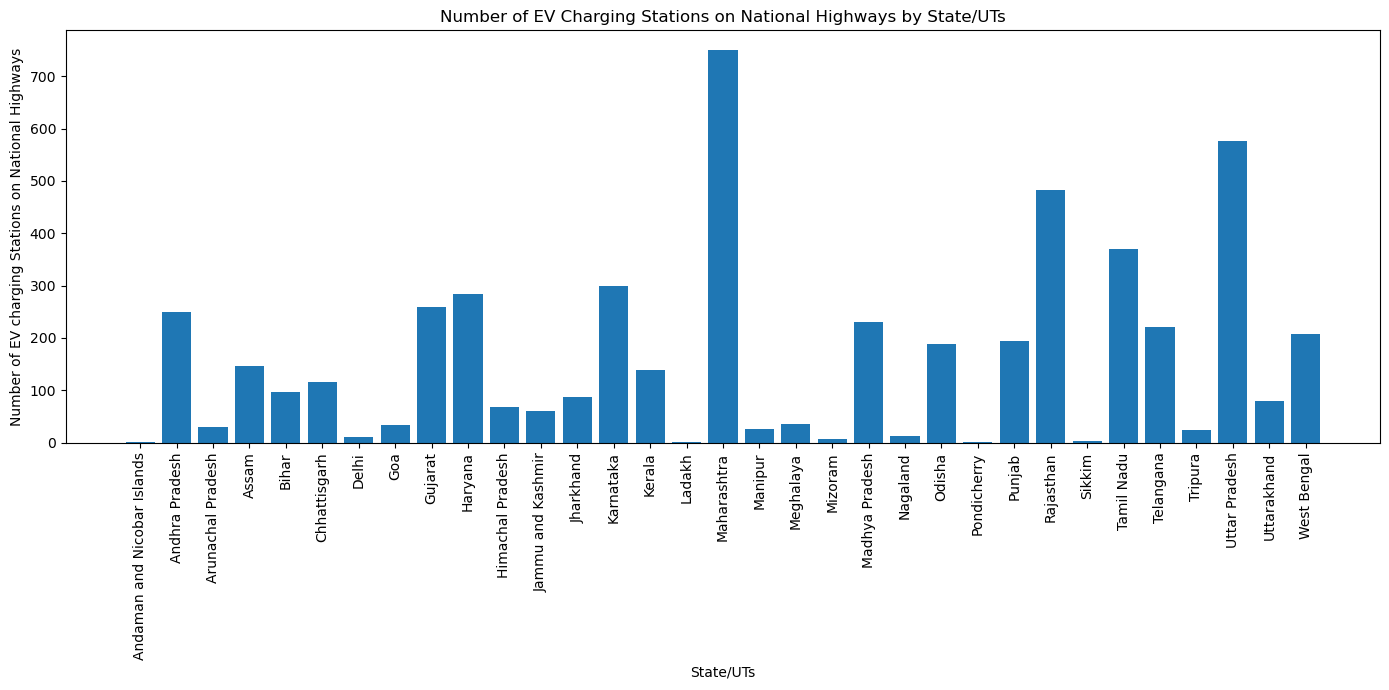

In [65]:
plt.figure(figsize=(14, 7))
plt.bar(df1["State/UTs"], df1["Number of EV charging Stations on National Highways"])
plt.xlabel("State/UTs")
plt.ylabel("Number of EV charging Stations on National Highways")
plt.title("Number of EV Charging Stations on National Highways by State/UTs")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

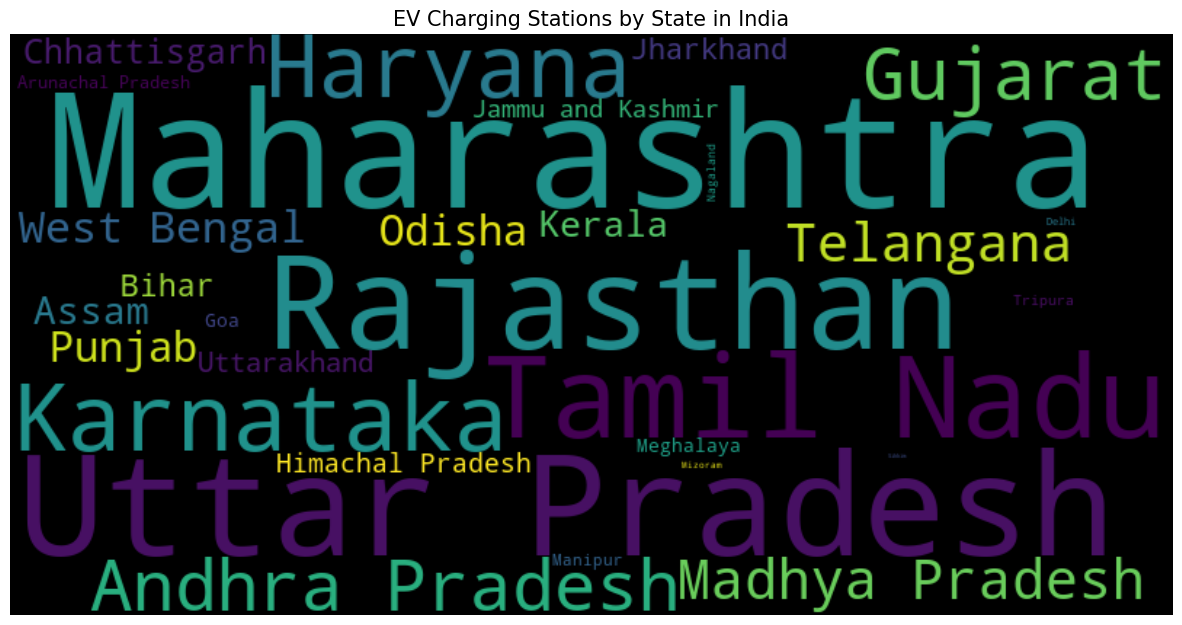

In [67]:
# Create a dictionary from your DataFrame where keys are states and values are the number of EV stations
word_freq = dict(zip(df1['State/UTs'], df1['Number of EV charging Stations on National Highways']))
wordcloud = WordCloud(width=800, height=400, background_color='Black', 
                      colormap='viridis').generate_from_frequencies(word_freq)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('EV Charging Stations by State in India', fontsize=15)
plt.show()

In [73]:
df2 = pd.read_csv('C:\\Users\\Admin\\Downloads\\RS_Session_260_AU_2349_A_to_B.csv') 
df2 = df2.iloc[:-1]
df2.drop(columns ='Sl.No.', axis=1, inplace=True)

In [75]:
df2

,State/UT,Electric,Non-electric
0,Andaman and Nicobar Islands,190,161258
1,Andhra Pradesh,67905,16553509
2,Arunachal Pradesh,28,303673
3,Assam,120423,5312457
4,Bihar,161060,11631081
5,Chandigarh,7964,841172
6,Chhattisgarh,54848,7413951
7,Delhi,233212,13994966
8,Goa,12615,1206476
9,Gujarat,138410,22804558


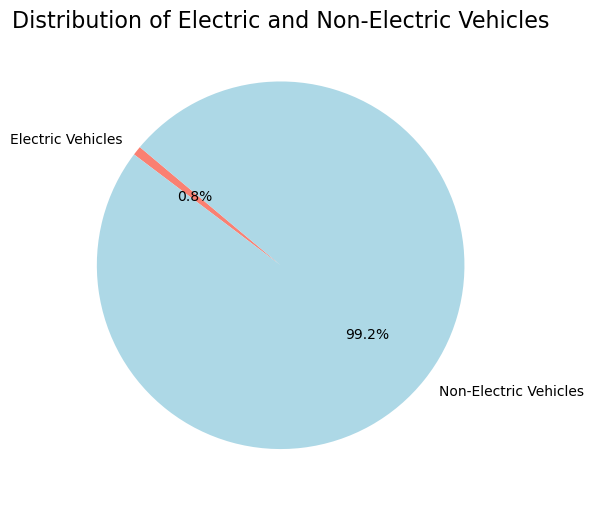

In [99]:
total_electric = df2['Electric'].sum()
total_non_electric = df2['Non-electric'].sum()

sizes = [total_electric, total_non_electric]
labels = ['Electric Vehicles', 'Non-Electric Vehicles']
colors = ['salmon', 'lightblue']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Electric and Non-Electric Vehicles', fontsize=16)
plt.tight_layout()
plt.show()